In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Sony\Desktop\Heart__Disease\heart.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.isnull().sum().sum()

0

# So, we have no missing values

In [8]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# EDA

In [9]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64


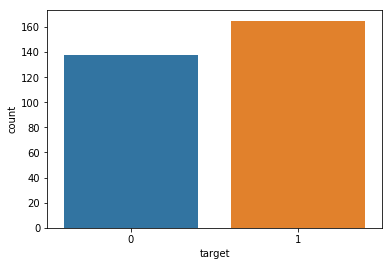

In [10]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [11]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [12]:
data["sex"].unique()

array([1, 0], dtype=int64)

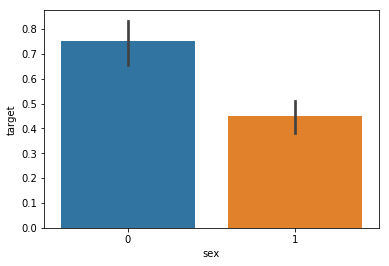

In [13]:
sns.barplot(data["sex"],data["target"])

# Percentage of patient with or without heart problems in the given dataset:

In [14]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

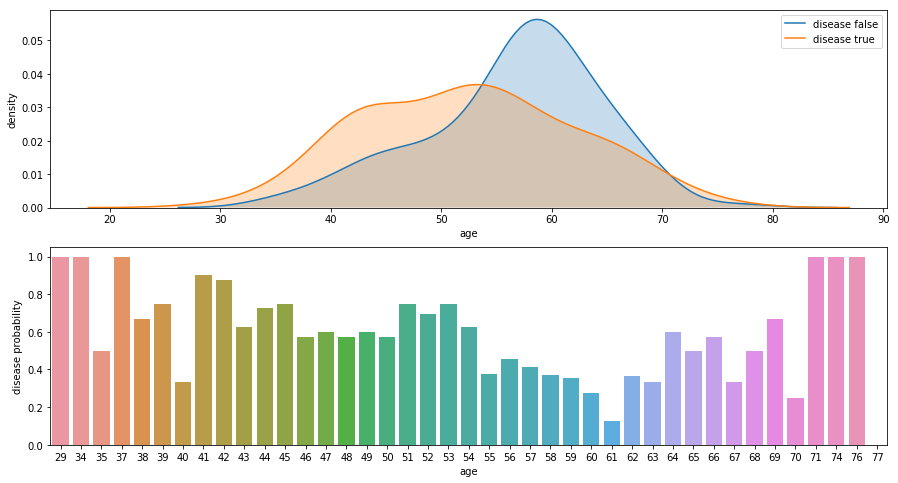

<Figure size 216x216 with 0 Axes>

In [15]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

# Here 0 is female and 1 is male patients

In [16]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [17]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [18]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [19]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

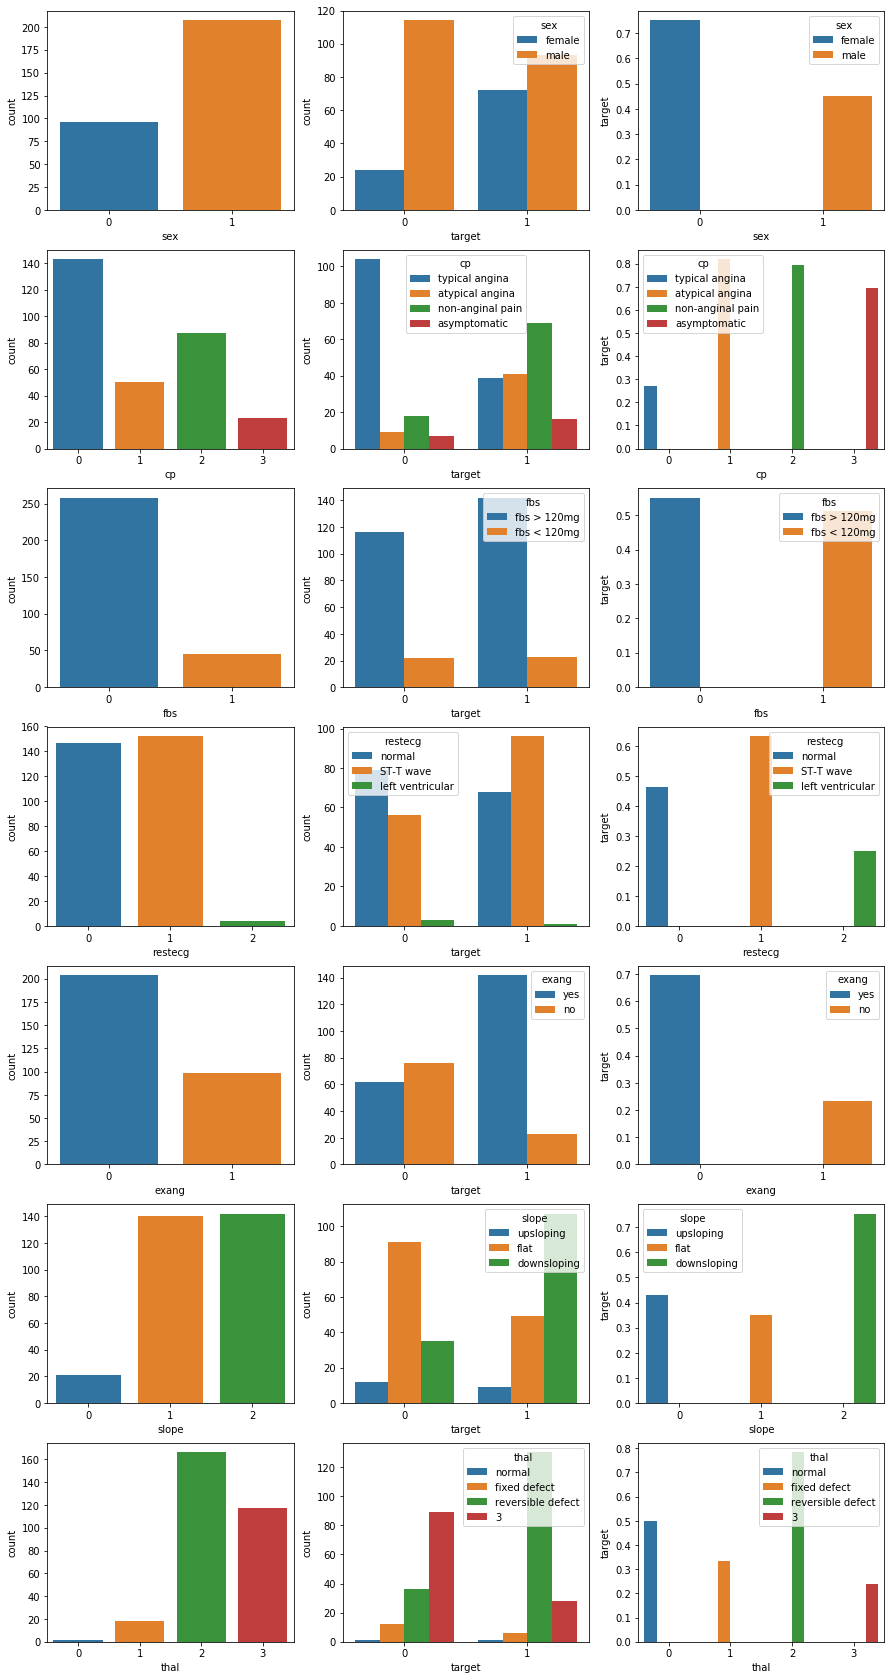

In [20]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [21]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [22]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

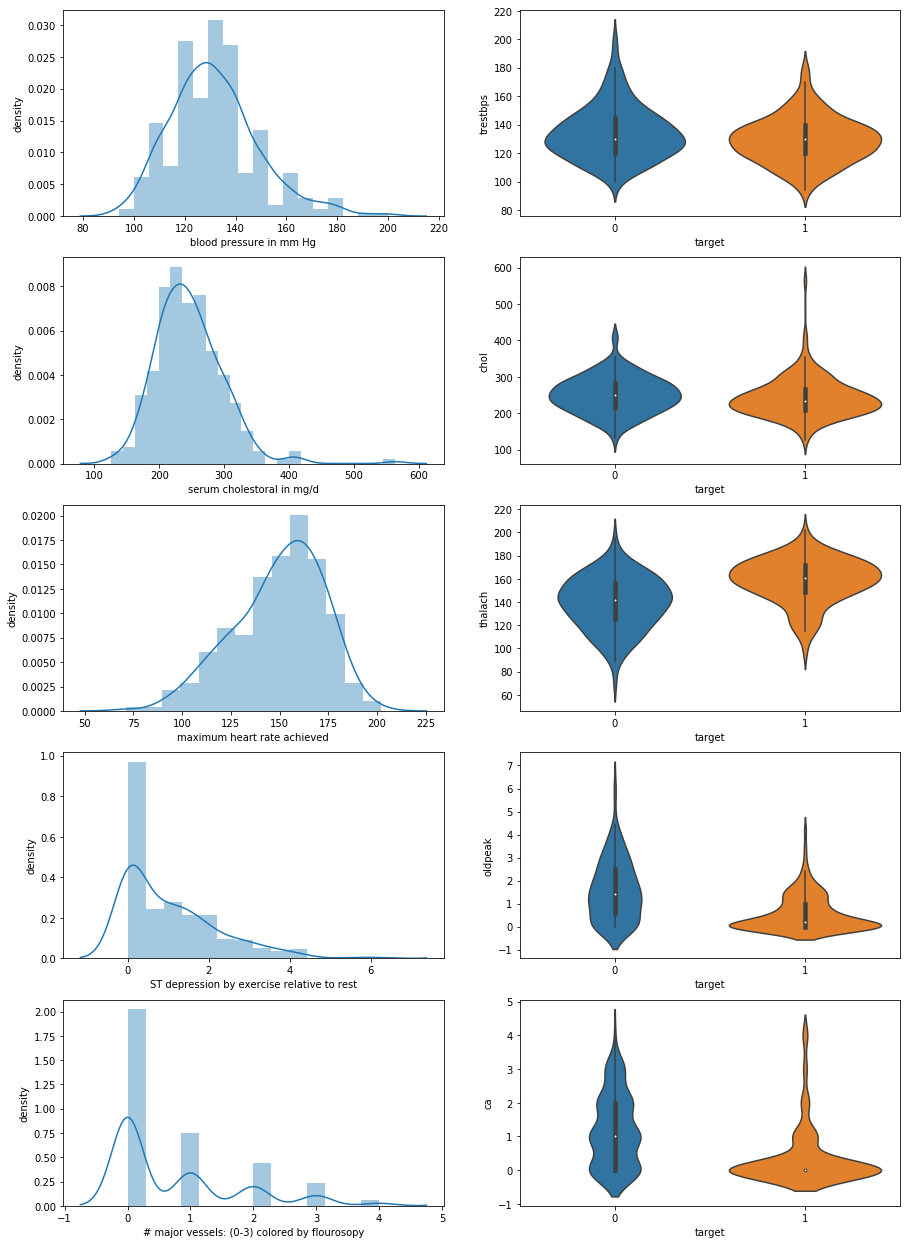

In [23]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

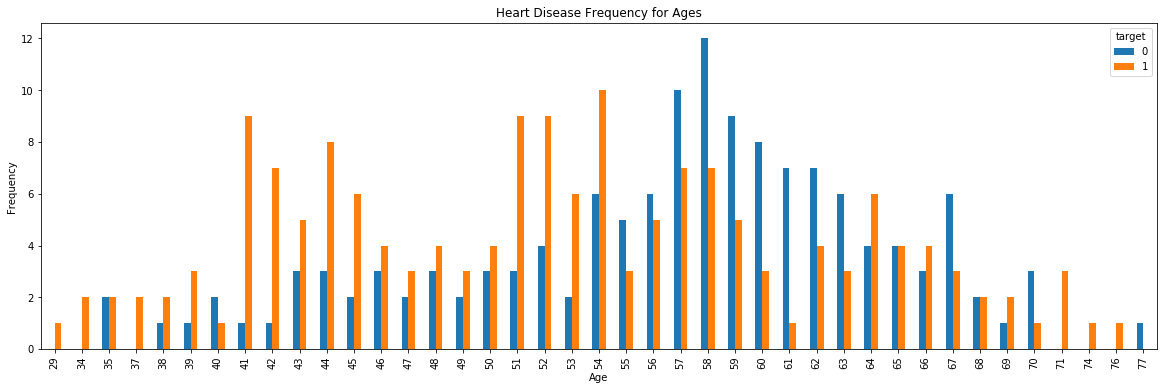

In [24]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

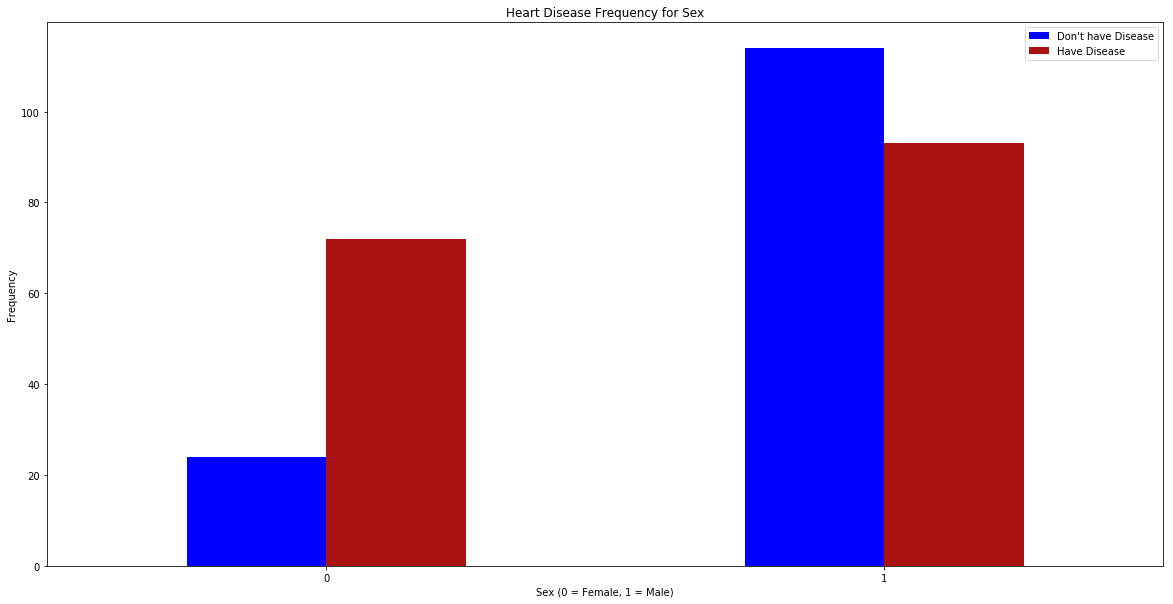

In [25]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [27]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar

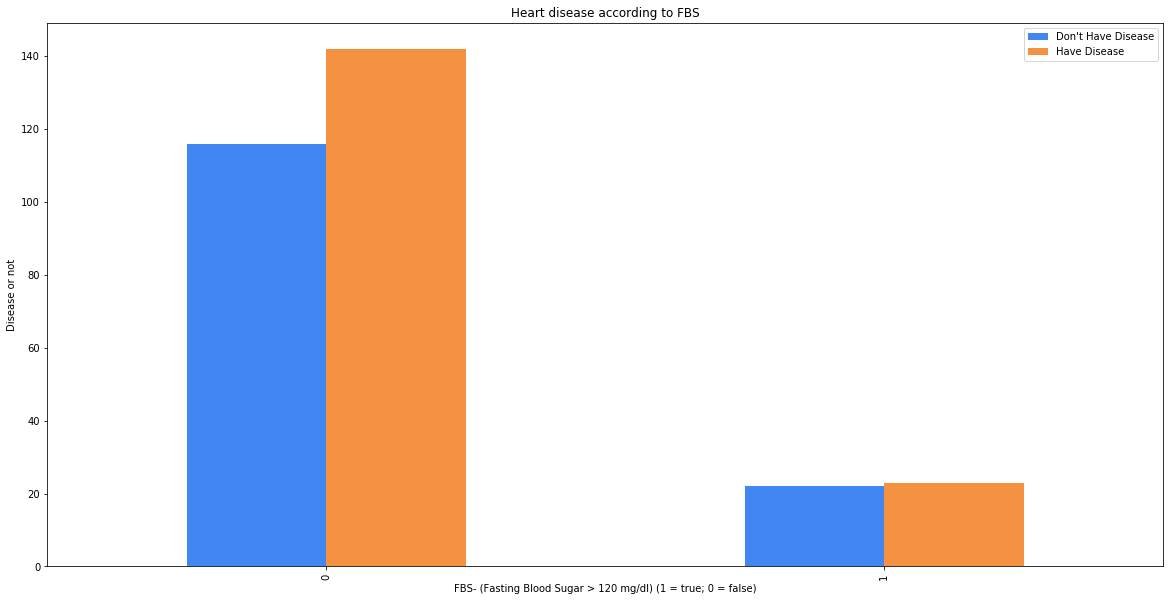

In [28]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

# [Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [29]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

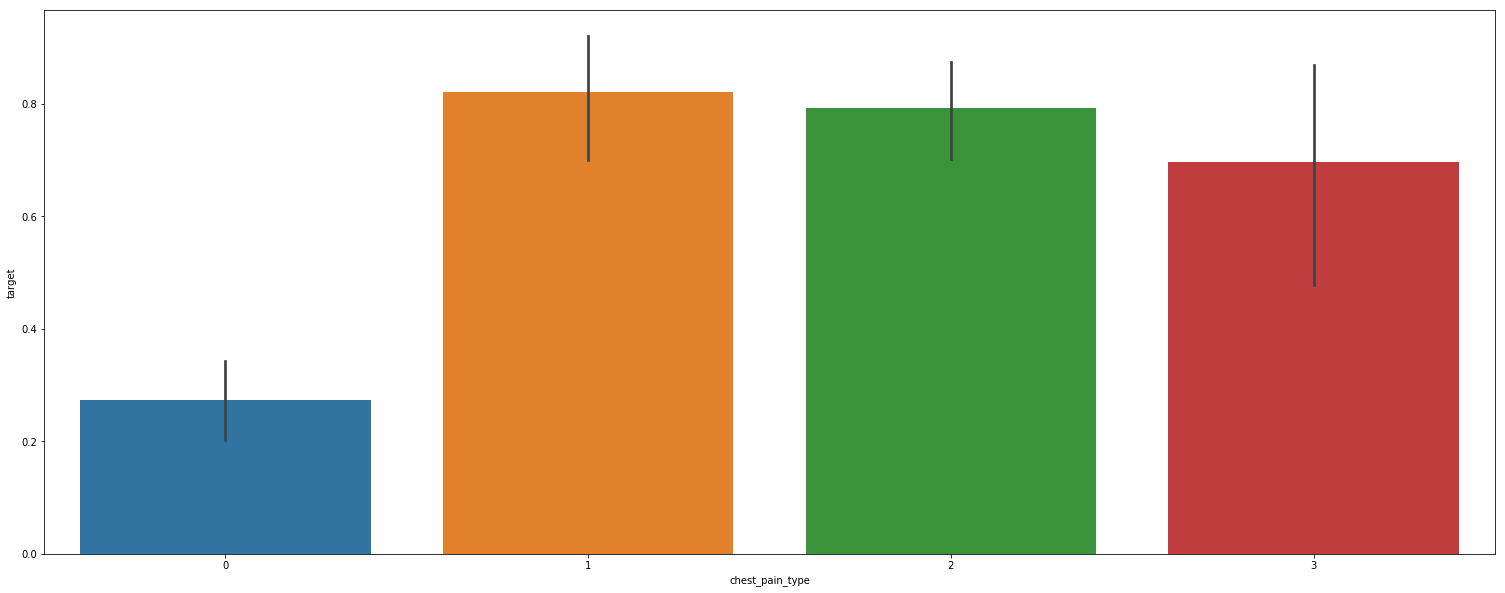

In [30]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [31]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

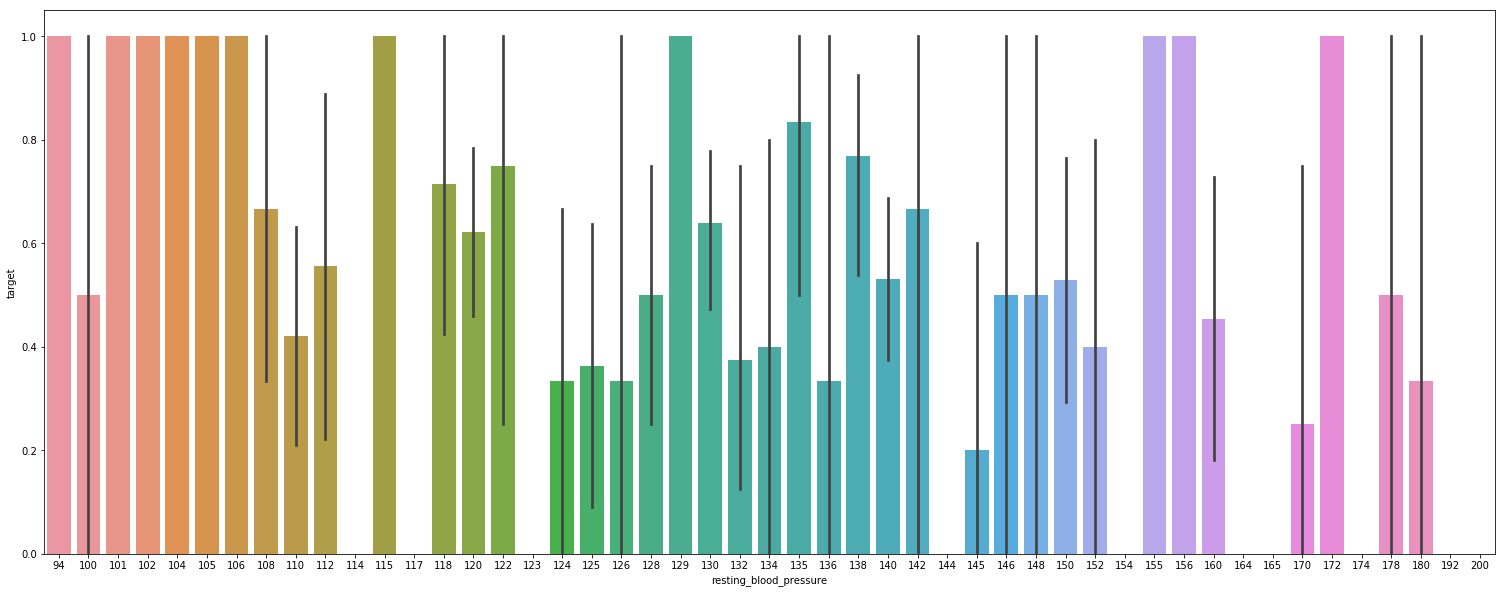

In [32]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [33]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

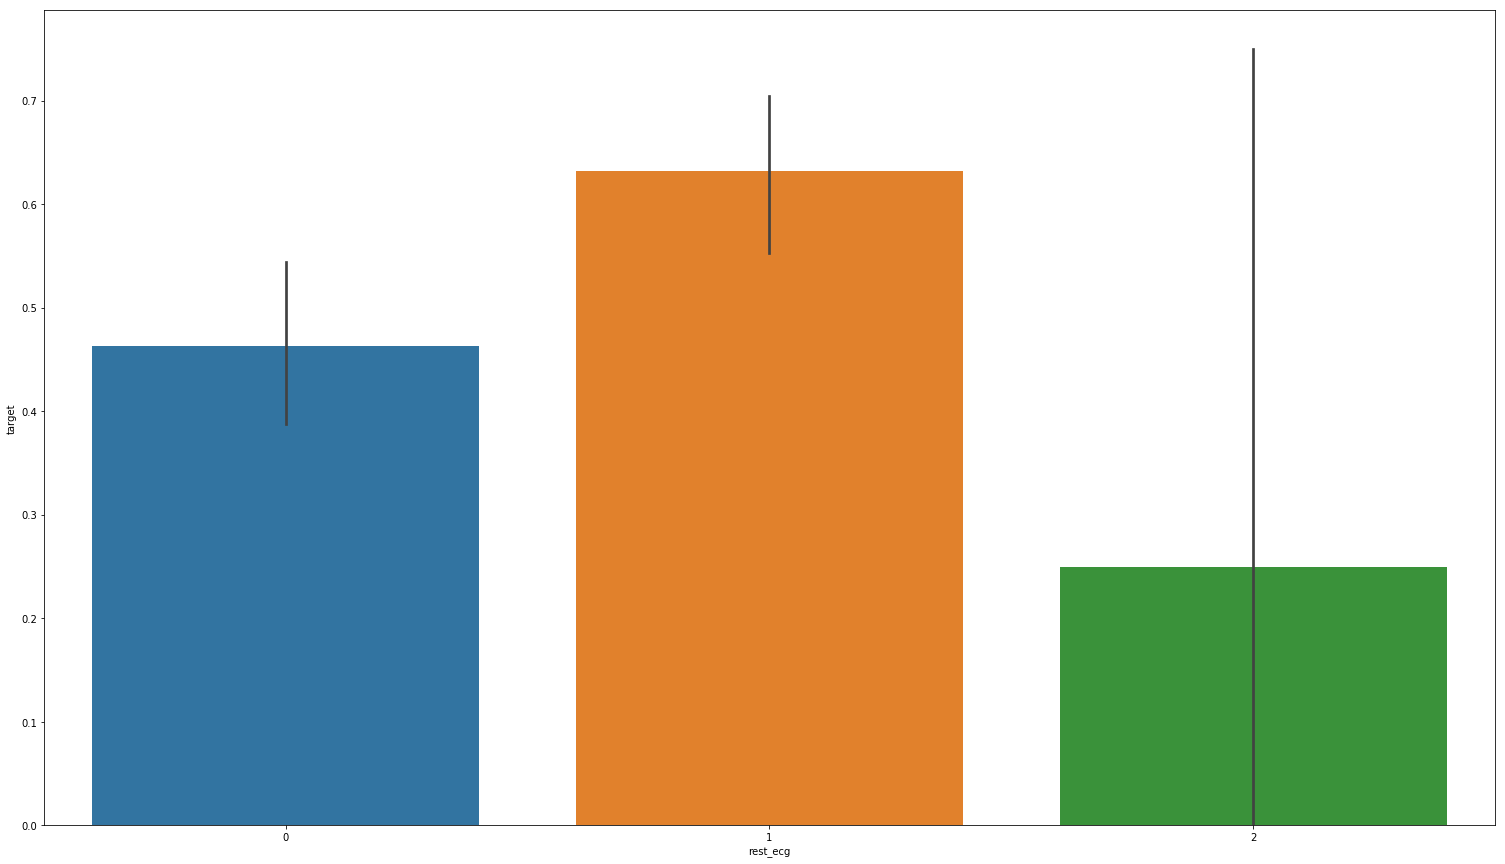

In [35]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

# people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing Exercise induced angina (1 = yes; 0 = no)

In [36]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

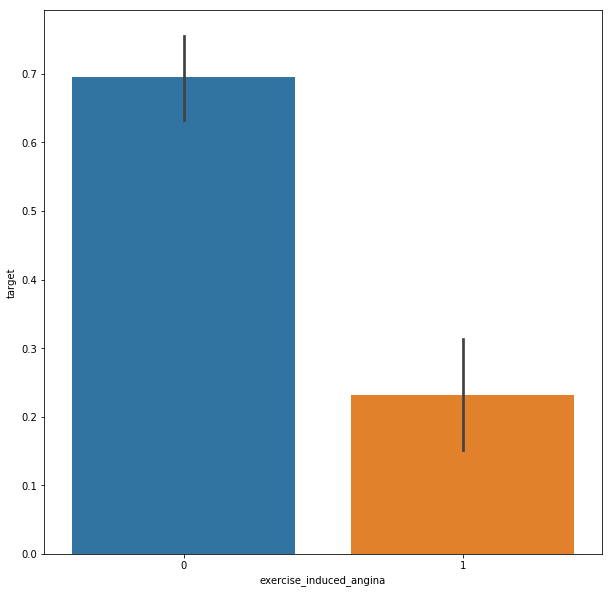

In [37]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

# People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [38]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

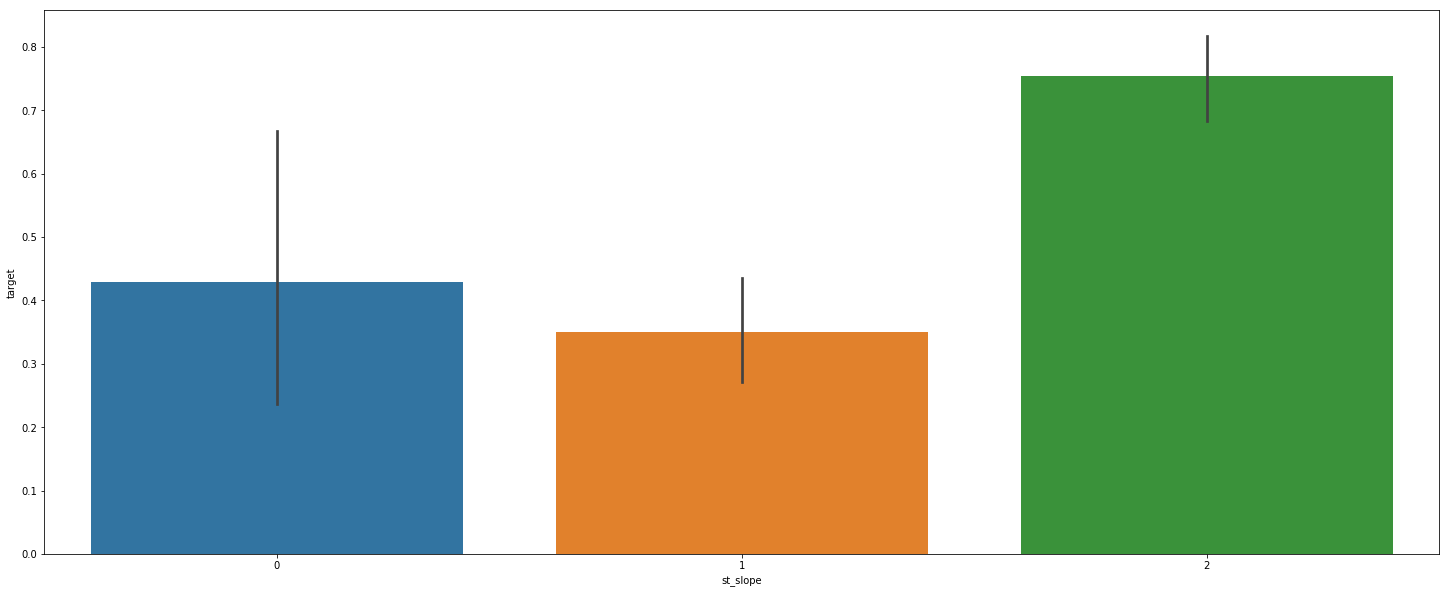

In [39]:
plt.figure(figsize=(25, 10))
sns.barplot(data["st_slope"],y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [40]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

# count num_major vessels

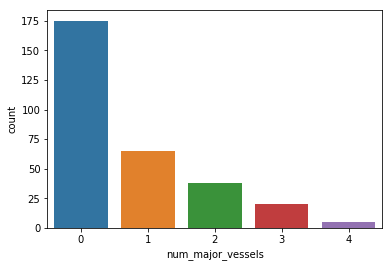

In [41]:
sns.countplot(data["num_major_vessels"])

# comparing with target

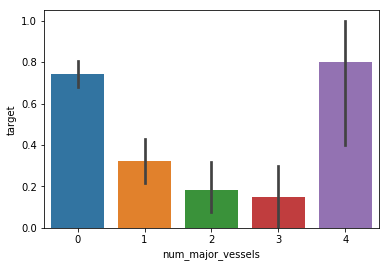

In [42]:
sns.barplot(data["num_major_vessels"],y)

num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [43]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

# plotting the thalassemia distribution (0,1,2,3)

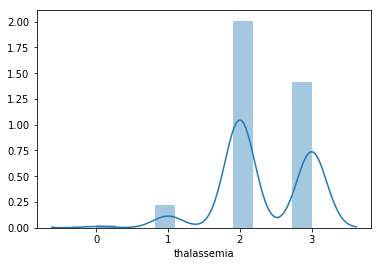

In [44]:
sns.distplot(data["thalassemia"])

# comparing with target

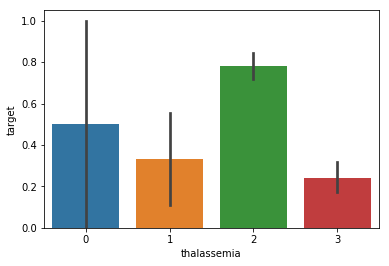

In [45]:
sns.barplot(data["thalassemia"],y)

# thalassemia and cholesterol scatterplot

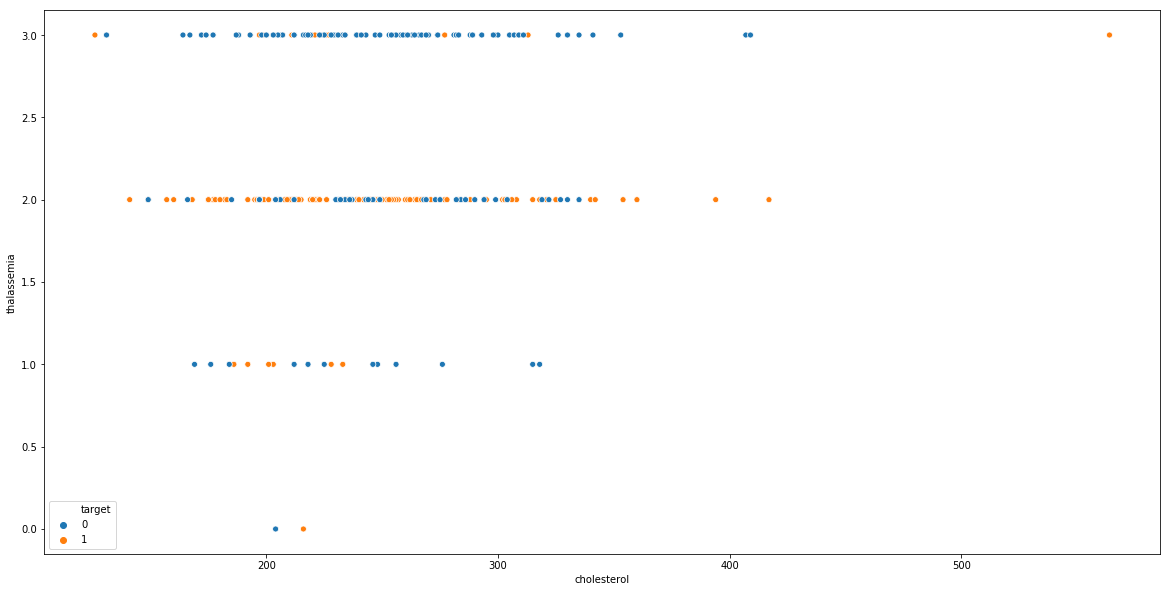

In [46]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

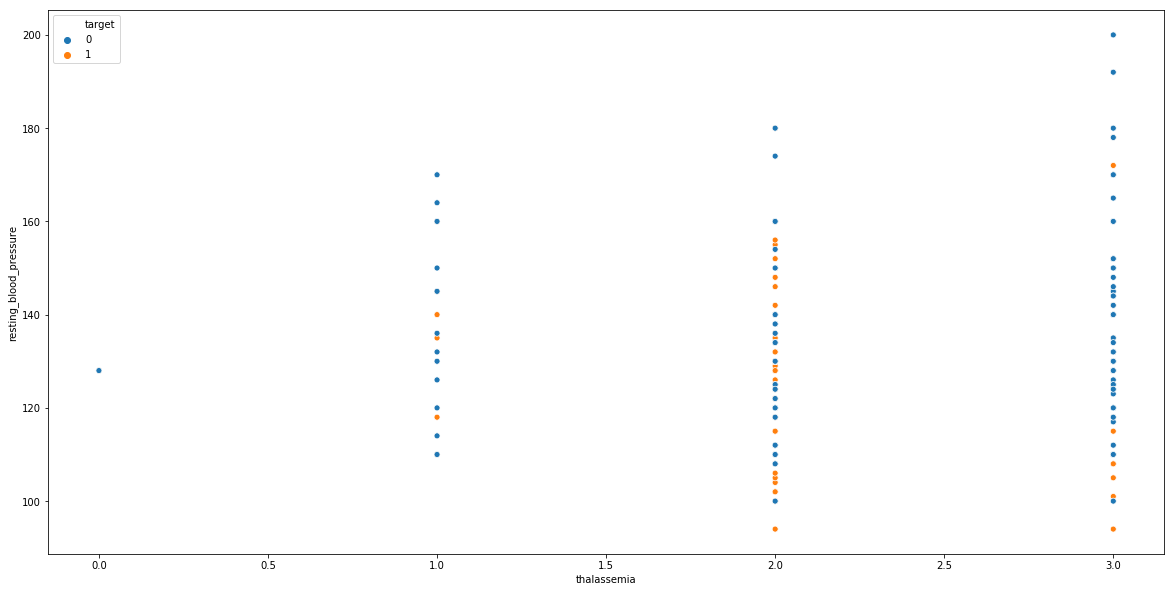

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

# Health rate vs age

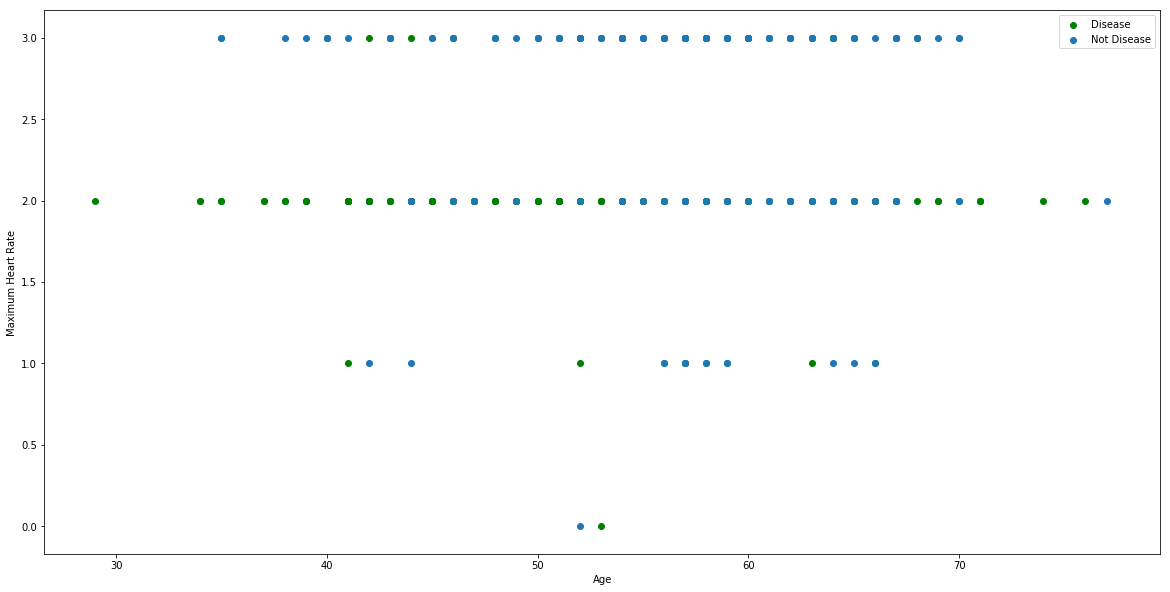

In [48]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

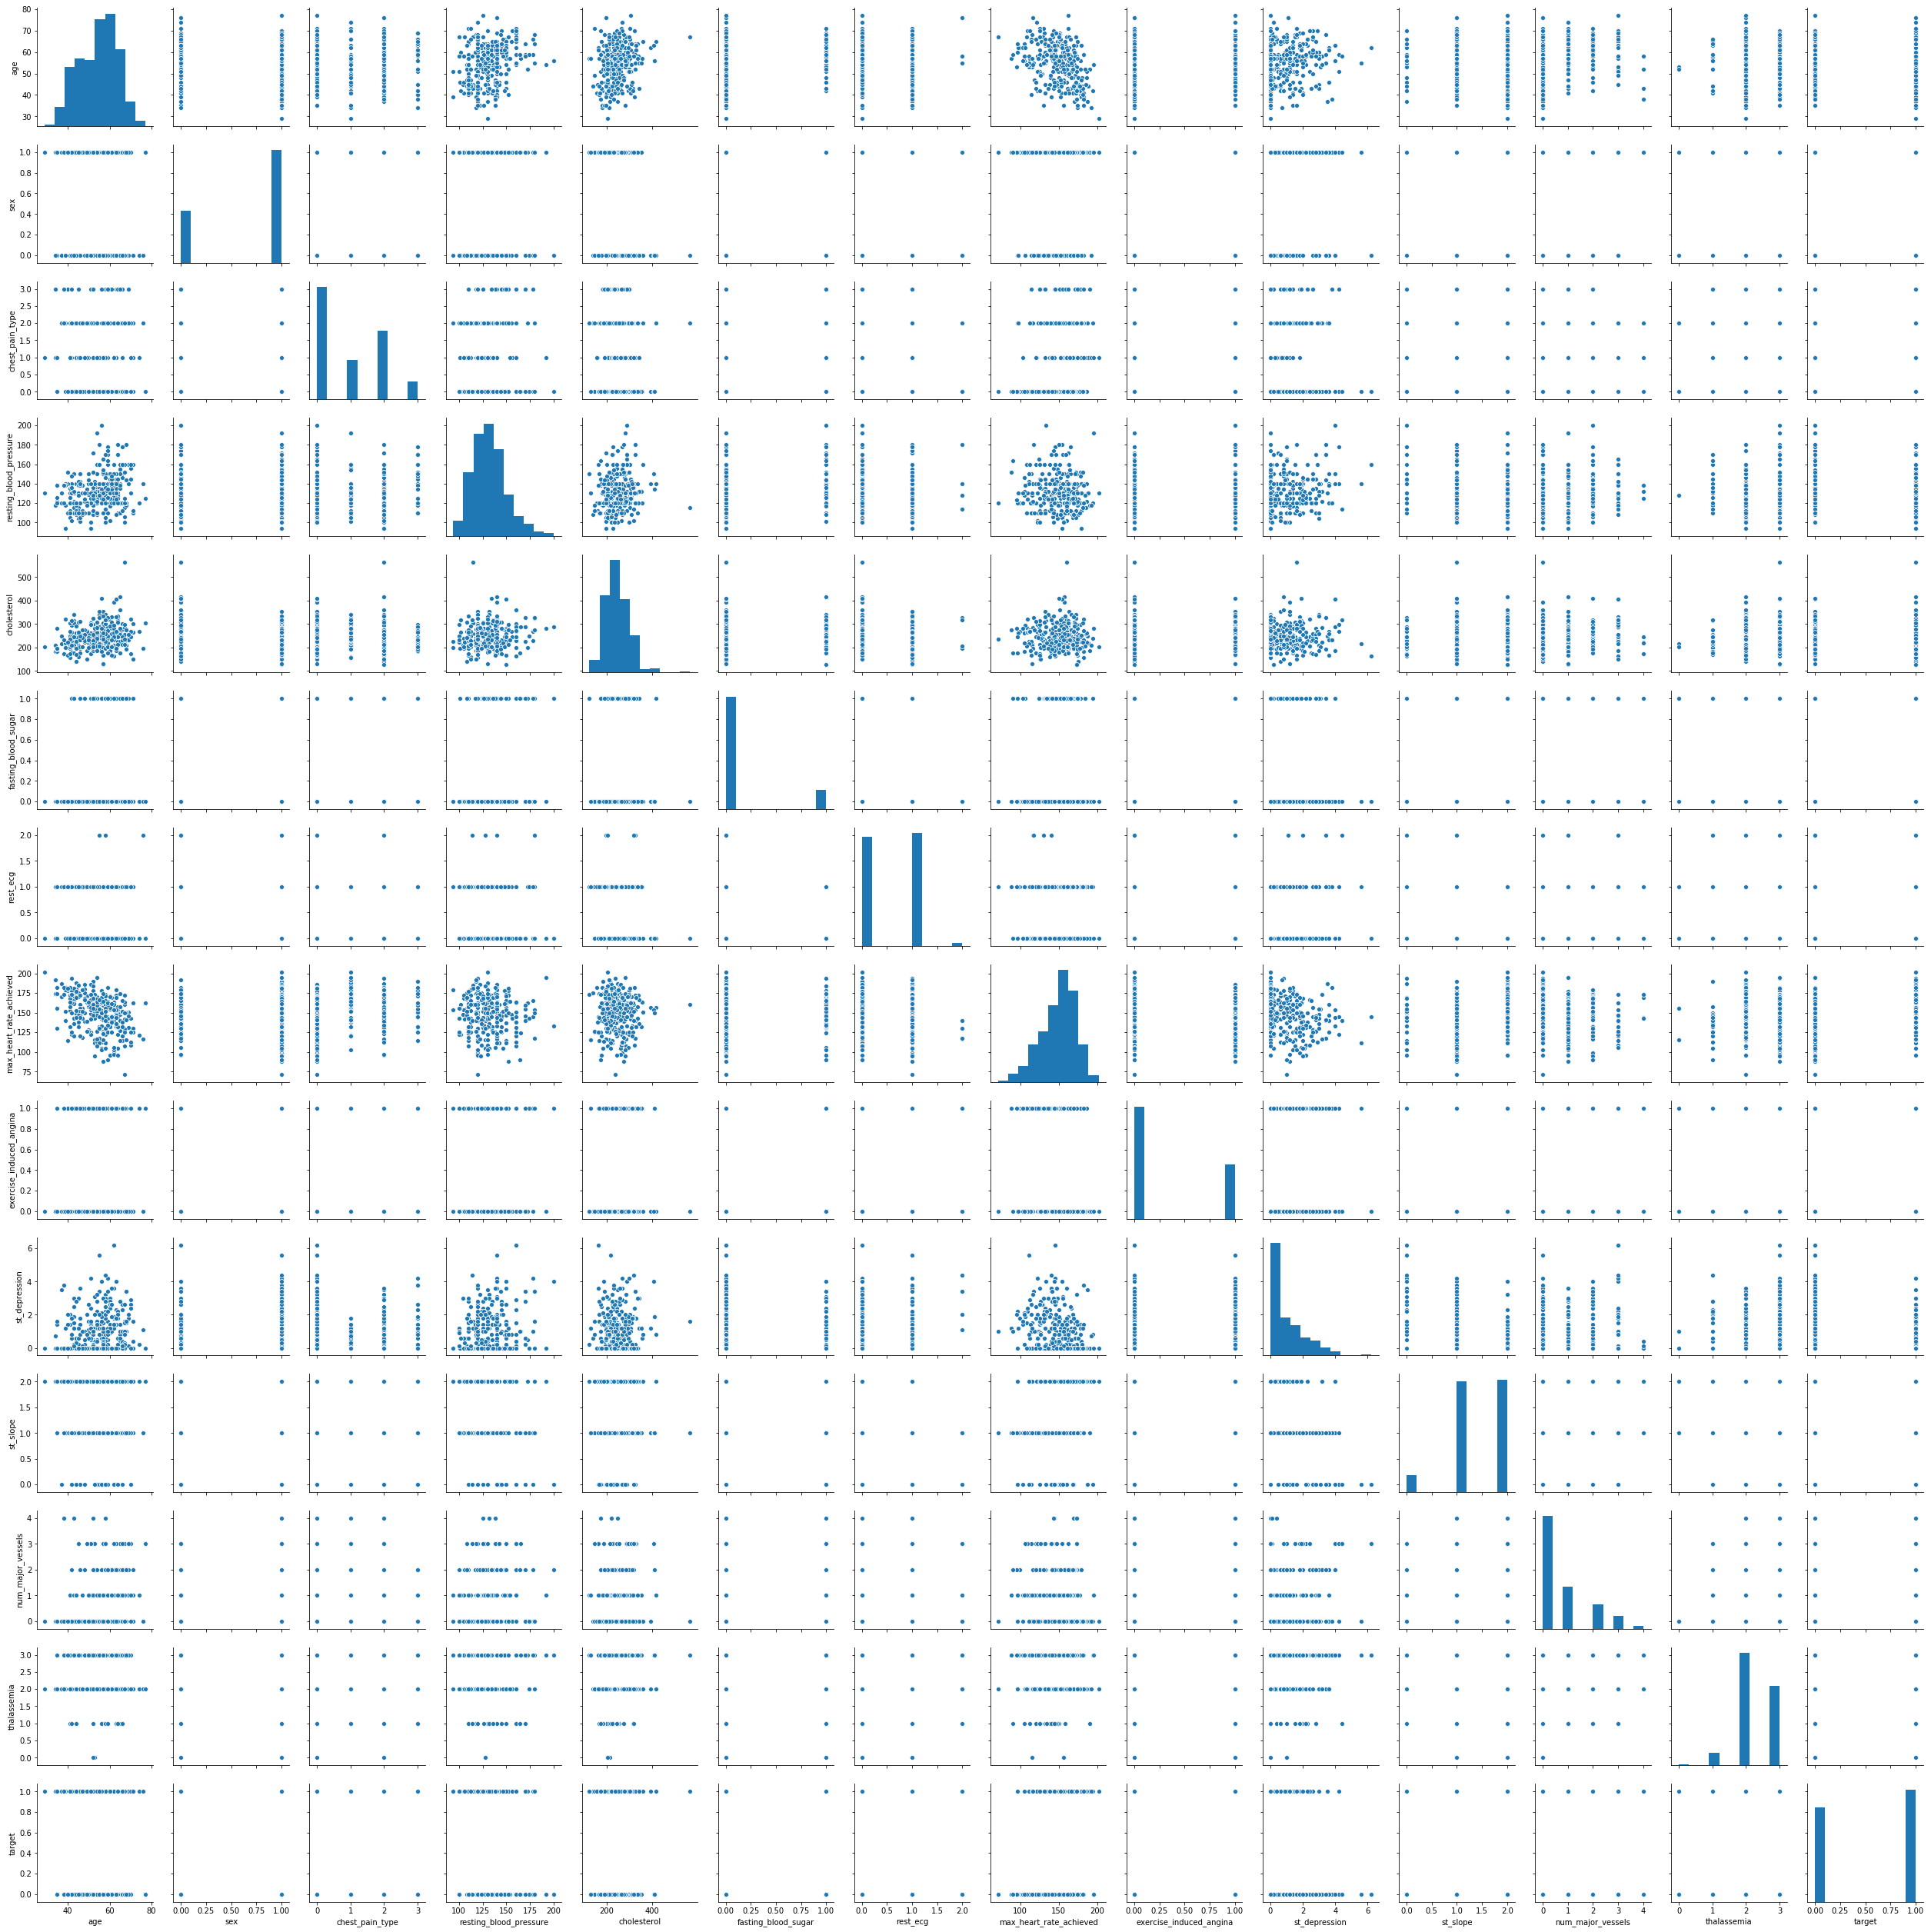

In [49]:
sns.pairplot(data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186E3376128>,
      dtype=object)

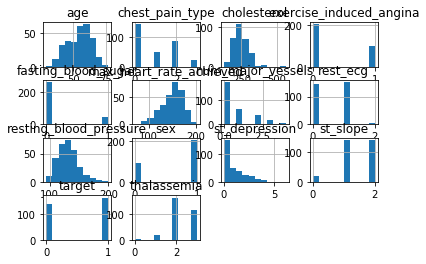

In [50]:
data.hist()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [51]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

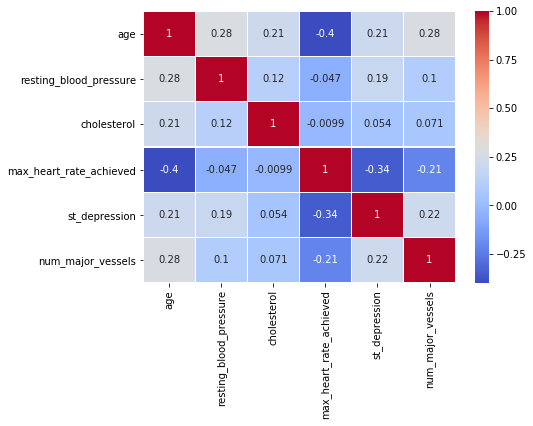

In [52]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Correlation analysis

In [53]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
5,57,140,192,148,0.4,0
6,56,140,294,153,1.3,0
7,44,120,263,173,0.0,0
8,52,172,199,162,0.5,0
9,57,150,168,174,1.6,0


# Splitting the dataset to Train and Test

In [54]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [55]:
X_train.shape

(242, 13)

In [56]:
X_test.shape

(61, 13)

In [57]:
Y_train.shape

(242,)

In [58]:
Y_test.shape

(61,)

# importing Accuracy score

In [59]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning

The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

In [60]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [62]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [63]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 84.71%
Test accuracy: 85.25%


In [64]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',                         
                         multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.9344262295081968

# Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
matrix= confusion_matrix(Y_test, y_pred_lr)

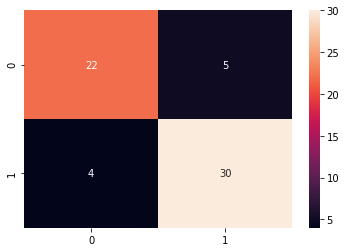

In [67]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision Score

In [68]:
from sklearn.metrics import precision_score

In [69]:
precision = precision_score(Y_test, y_pred_lr)

In [70]:
print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [71]:
from sklearn.metrics import recall_score

In [72]:
recall = recall_score(Y_test, y_pred_lr)

In [73]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F-Score

balance of precision and recall score

In [74]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


cm using bad style

In [75]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [76]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [77]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


# Learning curve for Training score & cross validation score

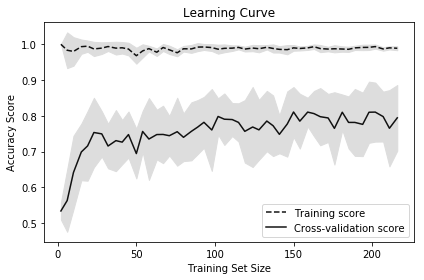

In [79]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [80]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [81]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [82]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


# Confusion matrix of Random Forest

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
matrix= confusion_matrix(Y_test, y_pred_rf)

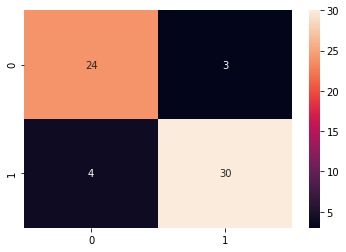

In [85]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [86]:
from sklearn.metrics import precision_score

In [87]:
precision = precision_score(Y_test, y_pred_rf)

In [88]:
print("Precision: ",precision)

Precision:  0.9090909090909091


# recall

In [89]:
from sklearn.metrics import recall_score

In [90]:
recall = recall_score(Y_test, y_pred_rf)

In [91]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F score

In [92]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


cm using bad style

In [93]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [94]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# False negative rate of the model

In [95]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [97]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [98]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


# Confusion matrix of Naive Bayes

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
matrix= confusion_matrix(Y_test, y_pred_nb)

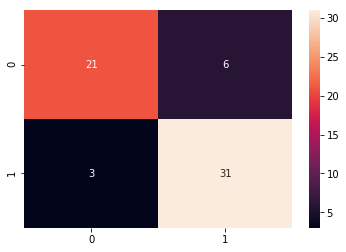

In [101]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [102]:
from sklearn.metrics import precision_score

In [103]:
precision = precision_score(Y_test, y_pred_nb)

In [104]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# Recall

In [105]:
from sklearn.metrics import recall_score

In [106]:
recall = recall_score(Y_test, y_pred_nb)

In [107]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [108]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


bad cm style

In [109]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [110]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# false negative rate of the model

In [111]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# KNN(K Nearest Neighbors)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [113]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [114]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [115]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 59.02%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


# Confusion matrix

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
matrix= confusion_matrix(Y_test, y_pred_knn)

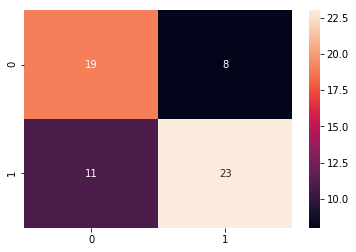

In [118]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [119]:
from sklearn.metrics import precision_score

In [120]:
precision = precision_score(Y_test, y_pred_knn)

In [121]:
print("Precision: ",precision)

Precision:  0.7419354838709677


# Recall

In [122]:
from sklearn.metrics import recall_score

In [123]:
recall = recall_score(Y_test, y_pred_knn)

In [124]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [125]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


bad cm

In [126]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [127]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# false negative rate of the model

In [129]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [131]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [132]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


# Discision Tree Visualization

In [133]:
df = pd.read_csv(r"C:\Users\Sony\Desktop\Heart__Disease\heart.csv")

In [134]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [136]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [137]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

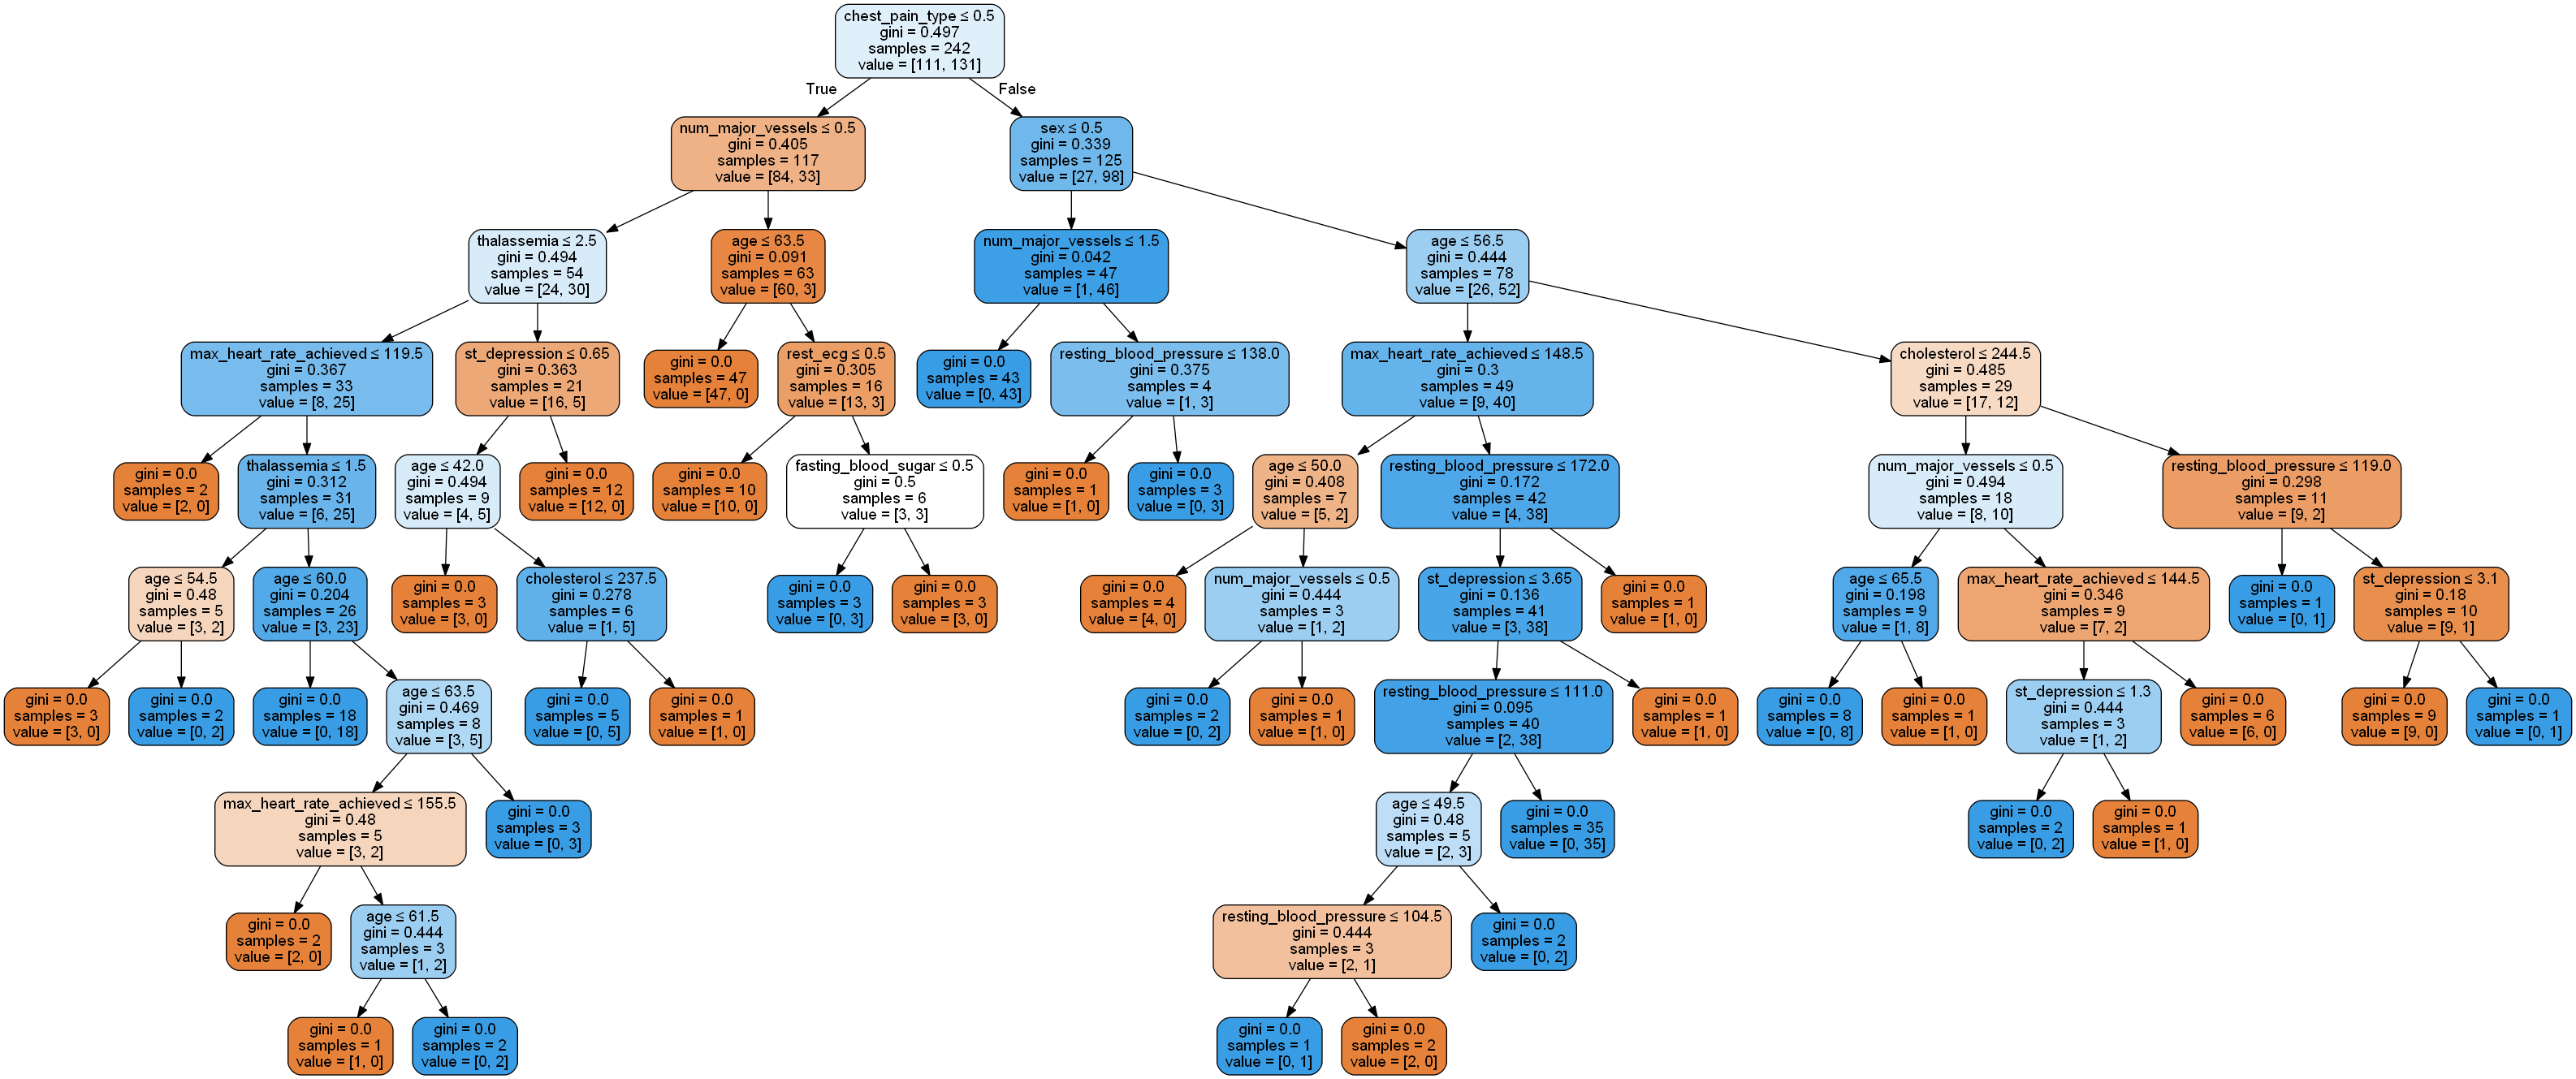

In [138]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [139]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [140]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

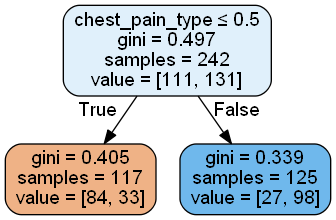

In [141]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Confusion Matrix

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
matrix= confusion_matrix(Y_test, y_pred_dt)

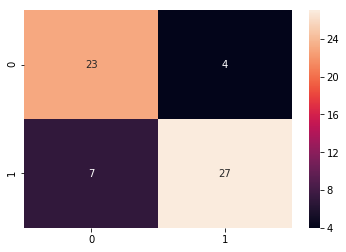

In [144]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [145]:
from sklearn.metrics import precision_score

In [146]:
precision = precision_score(Y_test, y_pred_dt)

In [147]:
print("Precision: ",precision)

Precision:  0.8709677419354839


# Recall

In [148]:
from sklearn.metrics import recall_score

In [149]:
recall = recall_score(Y_test, y_pred_dt)

In [150]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


# f score

In [151]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


bad cm style

In [152]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,23,4
1,7,27


# False negative rate

In [153]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

# FINAL SCORE

In [154]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [155]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.688525
Decision Trees,0.819672
Logistic Regression,0.852459
Naive Bayes,0.852459
Random Forests,0.885246


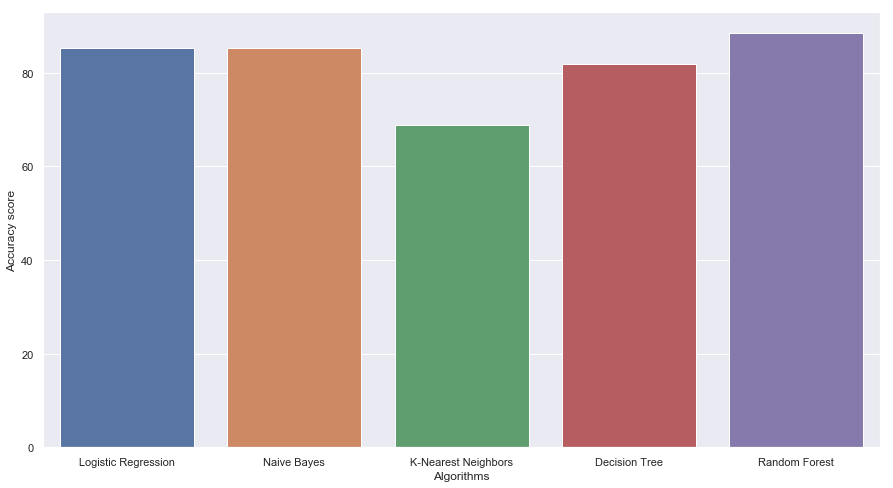

In [156]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# So Random Forest algorithm is the best here and Naive Bayes is the 2nd Best

# And here KNN is the worst algorithm